In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp
import math
from scipy.constants import N_A

In [114]:
#params

kon = 1e5
koff = 1e-4
Target_cell_number = 5e3
rtot_t = 1e5
tumour_cell_radius = 8e-6
tumour_cell_surface_area = 4*math.pi*((tumour_cell_radius)**2)
r_ab = 1.25e-8
reaction_volume = (2/3)*math.pi*((r_ab)**3)
target_effective_conc =(rtot_t)*(tumour_cell_surface_area)*(1/N_A)/(reaction_volume)

k2 = target_effective_conc*kon
print(k2/koff)

32647.526491891567


In [115]:

def dimensionless_model(t, z, A0, rtot_t, kon):
    k = kon*A0
    alpha = k/koff
    Atot = 1e16*A0/Target_cell_number
    beta = Atot/rtot_t
    target_effective_conc =(rtot_t)*(tumour_cell_surface_area)*(1/N_A)/(reaction_volume)
    k2 = target_effective_conc*kon
    alpha2 = k2/koff

    dA1 = 2*alpha*(1-z[0]-2*z[1])*(beta-z[0]-z[1]) - z[0] - alpha2*(1-z[0]-2*z[1])*z[0] + 2*z[1]
    dA2 = alpha2*(1-z[0]-2*z[1])*z[0] - 2*z[1]

    return [dA1, dA2]

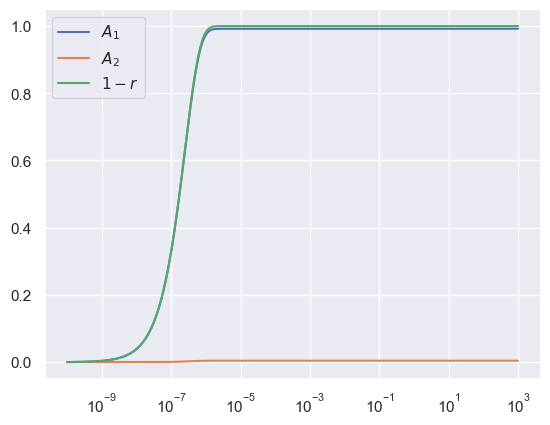

In [116]:
t_end = 1000
t = np.geomspace(1e-10, t_end, 5000)
tspan = [1e-10, t_end]
z0 = [0, 0]
A_0 = 1e-5
Atot = 1e16*A_0/Target_cell_number
beta = Atot/rtot_t

z = solve_ivp(dimensionless_model, tspan, z0, method='Radau', t_eval=t, args=(A_0, rtot_t, kon))

A1 = z.y[0]
A2 = z.y[1]
r = 1-(1-z.y[0]-2*z.y[1])


sns.set_theme()
plt.plot(t, A1, label = r'$A_1$')
plt.plot(t, A2, label = r'$A_2$')
plt.plot(t, r, label = r'$1-r$')
plt.xscale('log')
plt.legend(loc='best')
plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/ModelR_10^-5')

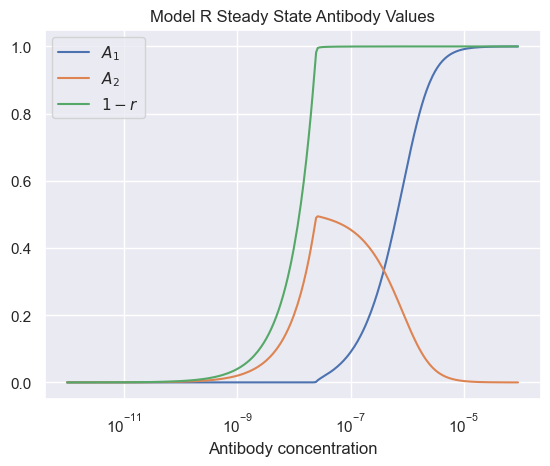

In [117]:
vals = np.linspace(1, 9, 50)

A0s1 = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
A0s = []

for x in A0s1:
    for val in vals:
        A0s.append(x*val)

A1s = np.ones_like(A0s)
A2s = np.ones_like(A0s)

t_end = 100000
t = np.geomspace(1e-10, t_end, 5000)
tspan = [1e-10, t_end]
z0 = [0, 0]
r_vals = []


rs = np.ones_like(A0s)
for i in range(len(A0s)):
    z = solve_ivp(dimensionless_model, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], rtot_t, kon))
    A1 = z.y[0]
    A2 = z.y[1]
    r = 1 - (1 - A1 - 2*A2)
    A1s[i] = A1[-1]
    A2s[i] = A2[-1]
    rs[i] = r[-1]
r_vals.append(rs)

sns.set_theme()
#plt.scatter(A0s, A1s)
#plt.scatter(A0s, A2s)
plt.plot(A0s, A1s, label = r'$A_1$')
plt.plot(A0s, A2s, label = r'$A_2$')
plt.title('Model R Steady State Antibody Values')
plt.plot(A0s, rs, label = r'$1-r$')
plt.xscale('log')
plt.xlabel('Antibody concentration')
plt.legend(loc='best')
plt.show()


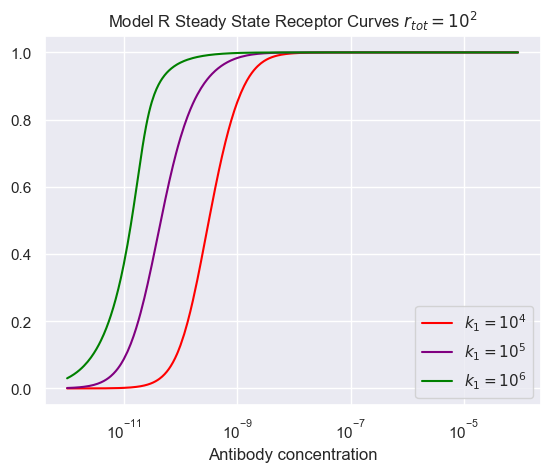

In [118]:
vals = np.linspace(1, 9, 50)

A0s1 = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
A0s = []

for x in A0s1:
    for val in vals:
        A0s.append(x*val)

A1s = np.ones_like(A0s)
A2s = np.ones_like(A0s)

t_end = 100000
t = np.geomspace(1e-10, t_end, 5000)
tspan = [1e-10, t_end]
z0 = [0, 0]
r_vals = []
kons = [1e4, 1e5, 1e6]
rtot_t = 1e2


for val in kons:
    rs = np.ones_like(A0s)
    for i in range(len(A0s)):
        z = solve_ivp(dimensionless_model, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], rtot_t, val))
        A1 = z.y[0]
        A2 = z.y[1]
        r = 1 - (1 - A1 - 2*A2)
        A1s[i] = A1[-1]
        A2s[i] = A2[-1]
        rs[i] = r[-1]
    r_vals.append(rs)

sns.set_theme()
#labels = [r'$r_{tot}=10^3$', r'$r_{tot}=10^4$', r'$r_{tot}=10^5$', r'$r_{tot}=10^6$', r'$r_{tot}=10^7$']
labels = [r'$k_1 = 10^4$', r'$k_1 = 10^5$', r'$k_1 = 10^6$']
colors=['red', 'purple', 'green']
#plt.plot(A0s, A1s, label = r'$A_1$')
#plt.plot(A0s, A2s, label = r'$A_2$')
plt.title('Model R Steady State Receptor Curves ' + r'$r_{tot}=10^2$')
for i in range(len(r_vals)):
    plt.plot(A0s, r_vals[i], colors[i], label = labels[i])
plt.xscale('log')
plt.xlabel('Antibody concentration')
plt.legend(loc='best')
plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/ModelR_Receptor_Curves_kon_var_rtot_1e2')


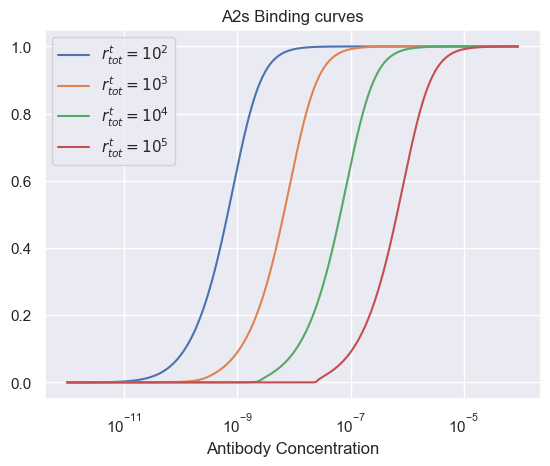

In [119]:
vals = np.linspace(1, 9, 50)

A0s1 = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
A0s = []

for x in A0s1:
    for val in vals:
        A0s.append(x*val)


t_end = 100000
t = np.geomspace(1e-10, t_end, 5000)
tspan = [1e-10, t_end]
z0 = [0, 0]
kons = [1e2, 1e3, 1e4, 1e5]
r_vals = []

for val in kons:
    rtot_t = val
    rs = np.ones_like(A0s)
    A1s = np.ones_like(A0s)
    A2s = np.ones_like(A0s)
    for i in range(len(A0s)):
        z = solve_ivp(dimensionless_model, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], rtot_t, kon))
        A1 = z.y[0]
        A2 = z.y[1]
        r = 1 - (1 - A1 - 2*A2)
        A1s[i] = A1[-1]
        A2s[i] = A2[-1]
        rs[i] = r[-1]
    r_vals.append(A1s)

labels = [r'$r_{tot}^t = 10^2$', r'$r_{tot}^t = 10^3$', r'$r_{tot}^t = 10^4$', r'$r_{tot}^t = 10^5$']
for i in range(len(kons)):
    plt.plot(A0s, r_vals[i], label = labels[i])

plt.xscale('log')
plt.legend(loc='best')
plt.title('A2s Binding curves')
plt.xlabel('Antibody Concentration')
plt.show()